# Developing the Decision Tree Classifier

# Importing libraries

In [45]:
'''Main'''
import numpy as np
import pandas as pd
import os

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import graphviz
%matplotlib inline
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics

In [3]:
df = pd.read_csv("diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df.isnull().value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age    Outcome
False        False    False          False          False    False  False                     False  False      768
dtype: int64

In [9]:
# Generate feature matrix and labels array
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

### Model Preparation

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state=42)

In [11]:
len(X_train), len(X_test)

(614, 154)

In [12]:
# Develop the Decision Tree Classifier with Default Hyperparameters
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# Hyperparameter Optimization
param_griddt = {"criterion":("gini","entropy"), "max_depth":[1,3,5,7,9,12]}
grid_modeldt = GridSearchCV(estimator=dt, param_grid=param_griddt)
grid_modeldt.fit(X_train,y_train)
print("Best score: ", grid_modeldt.best_score_, "Best parameters:", grid_modeldt.best_params_)

Best score:  0.7590030654404905 Best parameters: {'criterion': 'entropy', 'max_depth': 3}


In [17]:
# Finalize the Decision Tree Classifier
dt = DecisionTreeClassifier(criterion= "entropy", max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

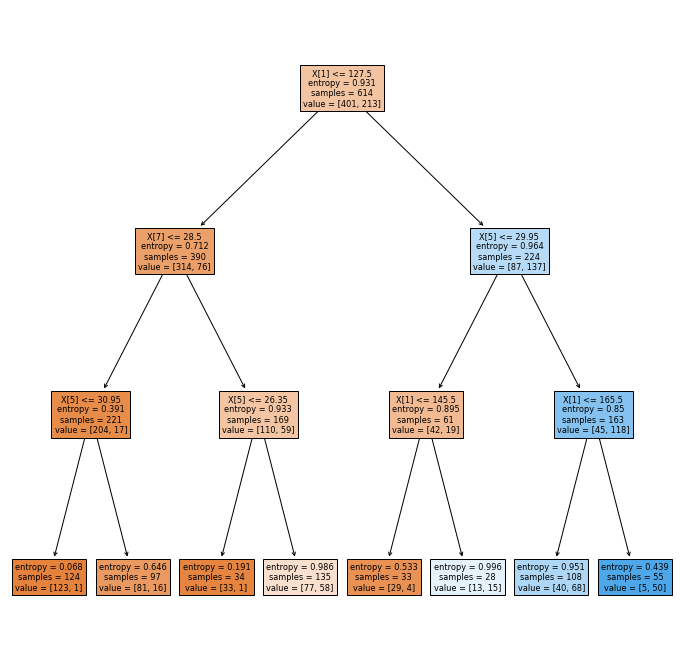

In [23]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 12))
tree.plot_tree(dt, filled=True)
plt.show()

#### Feature Importance
Feature importance determines the relative importance of independent variables to 
a dependent variable. It allocates a score that ranges from 0 to 1 to each independent 
variable. An independent variable with the highest score is the most important variable, 
an independent variable with the second highest score is the second most important 
variable, and so forth.

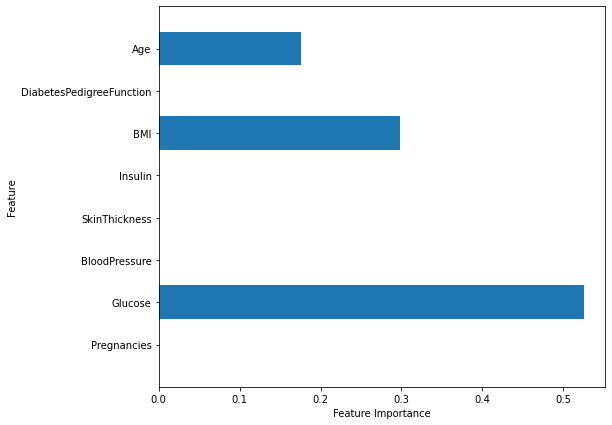

In [27]:
# Feature Importance
df_features = [x for i , x in enumerate(df.columns) if i!=8]
def plot_feature_importances_diabetes(model):
    plt.figure(figsize = (8, 7))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_features)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_diabetes(dt)
plt.savefig('feature_importance')    

Figure shows that there are a few important variables to the dependent variable. 
Glucose has the topmost score, meaning that it is more important than other variables 
to the dependent variable (diabetes outcome). This is followed by bmi and age,
respectively.I will use the previous findings to reduce the number of variables in the data.

In [28]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [33]:
# Re-processing
x = df[["Glucose","DiabetesPedigreeFunction","Age"]]
x = df.iloc[::, 0:8]
y = df.iloc[::, -1]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=0)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [36]:
# Actual Values and Predicted Values
y_preddt = dt.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predicted": y_preddt})

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,0
529,0,0
...,...,...
476,1,0
482,0,0
230,1,1
527,0,0


In [37]:
# Confusion Matrix
cmatdt = pd.DataFrame(confusion_matrix(y_test, y_preddt),
                      index = ["Actual: No", "Actual: Yes"],
                      columns=("Predicted: No", "Predicted: Yes"))

cmatdt

,Predicted: No,Predicted: Yes
Actual: No,93,14
Actual: Yes,23,24


In [38]:
# Classification Report
creportdt = pd.DataFrame(classification_report(y_test,y_preddt, 
                                                       output_dict=True)).transpose()
creportdt

,precision,recall,f1-score,support
0,0.801724,0.869159,0.834081,107.00000
1,0.631579,0.510638,0.564706,47.00000
accuracy,0.759740,0.759740,0.759740,0.75974
macro avg,0.716652,0.689899,0.699393,154.00000
weighted avg,0.749797,0.759740,0.751869,154.00000


Table indicates that the decision tree classifier performs poorly. The accuracy 
score is 74%.

### ROC Curve
The most reliable way involves predicting the probabilities of each class. First, I
predict the probabilities of each class. Thereafter, I construct an ROC and find the 
AUC.

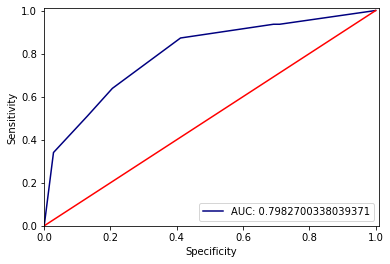

In [42]:
# ROC Curve
y_preddt_proba = dt.predict_proba(x_test)[::,1]
fprdt, tprdt, _ = metrics.roc_curve(y_test,y_preddt_proba)
aucdt = metrics.roc_auc_score(y_test, y_preddt_proba)
plt.plot(fprdt, tprdt, label="AUC: "+str(aucdt), color="navy")
plt.plot([0,1],[0,1],color="red")
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.legend(loc=4)
plt.show()

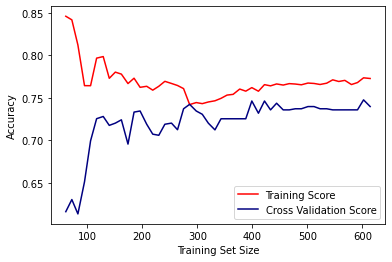

In [46]:
# Learning Curve
trainsizedt, trainscoredt, testscoredt = learning_curve(dt, x, y, 
                                                        cv=5, 
                                                        n_jobs=5, 
                                                        train_sizes=np.linspace(0.1,1.0,50))
trainscoredt_mean = np.mean(trainscoredt,axis=1)
testscoredt_mean = np.mean(testscoredt,axis=1)
plt.plot(trainsizedt,trainscoredt_mean,color="red", label="Training Score")
plt.plot(trainsizedt,testscoredt_mean,color="navy", label="Cross Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc=4)
plt.show()

Figure shows that the training accuracy score is higher than the cross validation 
from the time the decision tree classifier learns the data. The classifier starts off very 
optimistic, but as we increase the training set, the size drops and becomes comfortable 
around the 0.75 to 0.80 range.